In [1]:
# load needed package and .mat file data
import numpy as np
import scipy
import matplotlib.pyplot as plt

# read matlab data
mat = scipy.io.loadmat('data_full.mat')
T = mat['T']
u = mat['U']
v = mat['V']
x = np.squeeze(mat['X'])
y = np.squeeze(mat['Y'])
nu = np.squeeze(mat['nu'])

# plot size setting
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

x_grid, y_grid = np.meshgrid(x, y)

FileNotFoundError: [Errno 2] No such file or directory: 'data_full.mat'

1.(a) u_bar_plot


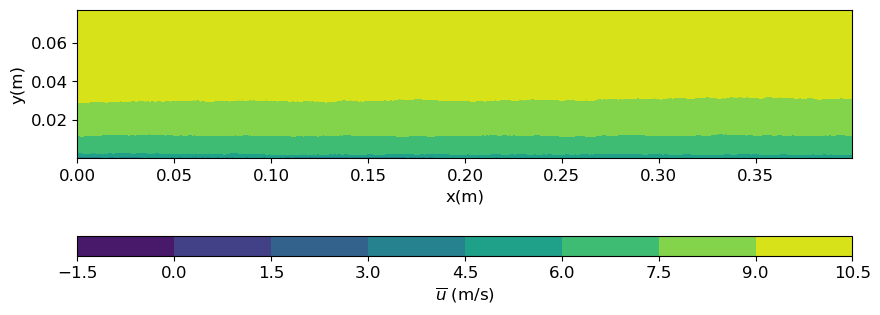

1.(a) u_t0_plot


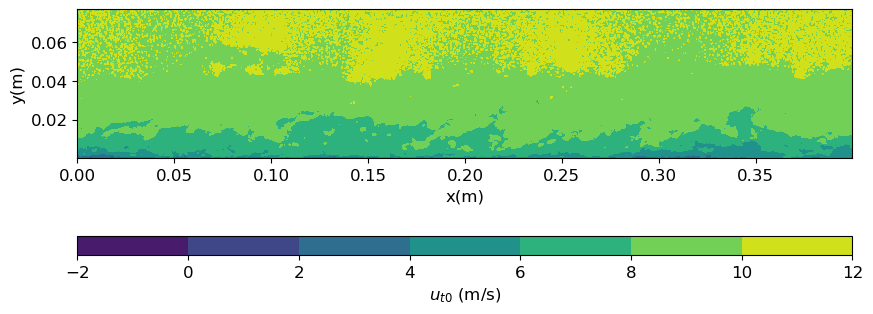

1.(a) u_t0_prime_plot


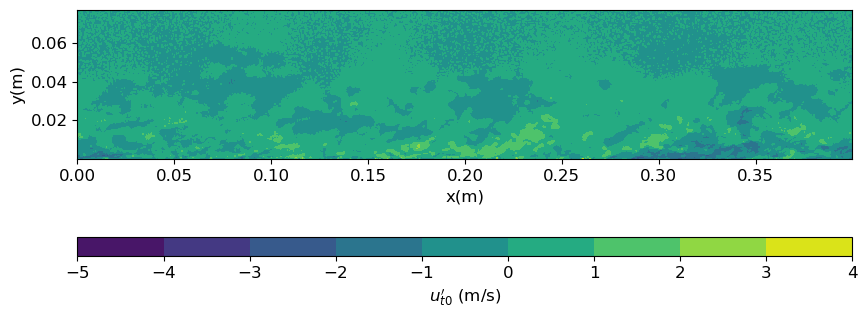

In [ ]:
# 1.(a) ================================================================
t0 = 250
u_bar = np.mean(u, 2)
u_t0 = u[:, :, t0]
u_prime_t0 = u_t0 - u_bar

print('1.(a) u_bar_plot')
fig, ax = plt.subplots()
plt_1 = ax.contourf(x_grid, y_grid, u_bar)
cbar = fig.colorbar(plt_1, location='bottom', aspect=40, anchor=(0.5,1.2))
ax.set_xlabel("x(m)", fontsize=12)
ax.set_ylabel("y(m)", fontsize=12)
ax.set_aspect('equal')
cbar.set_label(r"$\overline{u}$ (m/s)", fontsize=12)
plt.savefig('1a_u1_prime.pdf', bbox_inches="tight")
plt.show()

print('1.(a) u_t0_plot')
fig, ax = plt.subplots()
plt_1 = ax.contourf(x_grid, y_grid, u_t0)
cbar = fig.colorbar(plt_1, location='bottom', aspect=40, anchor=(0.5,1.2))
ax.set_xlabel("x(m)", fontsize=12)
ax.set_ylabel("y(m)", fontsize=12)
ax.set_aspect('equal')
cbar.set_label(r"$u_{t0}$ (m/s)", fontsize=12)
plt.savefig('1a_u1_prime.pdf', bbox_inches="tight")
plt.show()

print('1.(a) u_t0_prime_plot')
fig, ax = plt.subplots()
plt_1 = ax.contourf(x_grid, y_grid, u_prime_t0)
cbar = fig.colorbar(plt_1, location='bottom', aspect=40, anchor=(0.5,1.2))
ax.set_xlabel("x(m)", fontsize=12)
ax.set_ylabel("y(m)", fontsize=12)
ax.set_aspect('equal')
cbar.set_label(r"$u^\prime_{t0}$ (m/s)", fontsize=12)
plt.savefig('1a_u1_prime.pdf', bbox_inches="tight")
plt.show()

In [ ]:
# 1.(b) ===============================================================
U_inf = np.mean(u_bar[-11:-1, :], (0, 1))
print("free-stream velocity = ", U_inf)
u_bar_delta = np.mean(u_bar, 1)
delta_index = np.where(u_bar_delta >= 0.99*U_inf)
delta = y[delta_index[0][0]]
print("boundary-layer thickness= ", delta)

delta_star = 0
for i in range(0, 230):
    if i == 0:
        delta_star = y[i] * (1 - u_bar_delta[i]) / U_inf
    else:
        delta_star += (y[i] - y[i-1]) * (1 - u_bar_delta[i] / U_inf)
print("displacement thickness = ", delta_star)

theta = 0
for i in range(0, 230):
    if i == 0:
        theta = y[i] * (u_bar_delta[i] / U_inf) * (1 - u_bar_delta[i]) / U_inf
    else:
        theta += (y[i] - y[i-1]) * (u_bar_delta[i] / U_inf) * (1 - u_bar_delta[i] / U_inf)
print("momentum thickness = ", theta)

v_bar = np.mean(v, 2)
u_prime = u - np.tile(np.reshape(u_bar, (230, 1194, 1)), (1, 1, 500))
v_prime = v - np.tile(np.reshape(v_bar, (230, 1194, 1)), (1, 1, 500))
TI = (np.mean(u_prime[156:, :, :]**2) + np.mean(v_prime[156:, :, :]**2))**0.5 / U_inf
print("turbulence intensity = ", TI)

free-stream velocity =  10.06403287433262
boundary-layer thickness=  0.052512374
displacement thickness =  0.00850126221304143
momentum thickness =  0.006330758897094898
turbulence intensity =  0.027444946849030517


1.(a) u_t0_plot


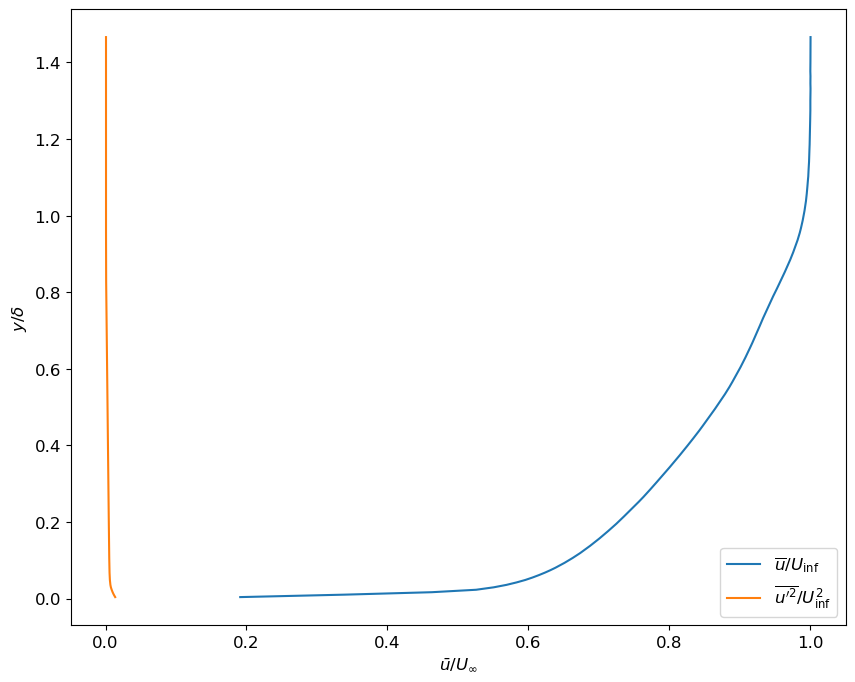

In [ ]:
# 1.(c) ===============================================================

print('1.(a) u_t0_plot')
fig, ax = plt.subplots()

ax.plot(u_bar_delta/U_inf, y/delta, label=r'$\overline{u}/U_\inf$')
ax.plot(np.mean(u_prime**2, (1, 2))/U_inf**2, y/delta, label=r'$\overline{u^{\prime 2}} / U^2_\inf$')
ax.legend(fontsize=12)
ax.set_xlabel(r"$\bar{u}/U_\infty$", fontsize=12)
ax.set_ylabel(r"$y/\delta$", fontsize=12)
plt.savefig('1a_u1_prime.pdf', bbox_inches="tight")
plt.show()


In [ ]:
# 1.(d) ===============================================================
# downstreamDistance = (delta/(0.375 * (U_inf/nu)**-0.2))**-0.8
downstreamDistance = ((delta/0.375)**5 * U_inf / nu)**(0.25)
print("downstream distance = ", downstreamDistance)

downstream distance =  2.4680981548147916


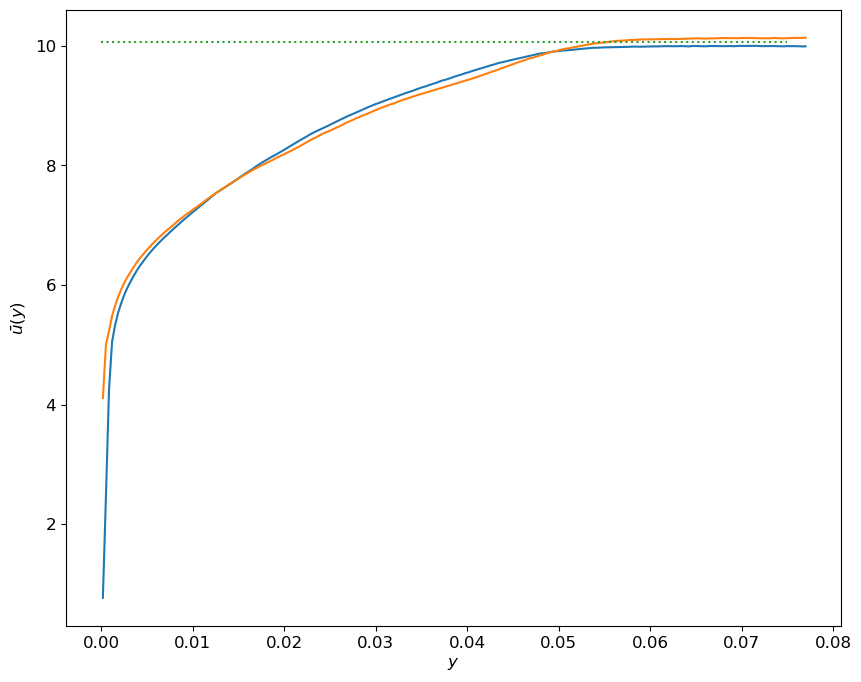

In [ ]:
# 1.(e) ===============================================================

u_first_100 = np.mean(u_bar[:, 0:100], 1)
u_last_100 = np.mean(u_bar[:, -101:-1], 1)

fig, ax = plt.subplots()
ax.plot(y, u_first_100)
ax.plot(y, u_last_100)
ax.plot([0, 0.075], [U_inf, U_inf], ls=':')
ax.set_ylabel(r"$\bar{u}(y)$", fontsize=12)
ax.set_xlabel(r"$y$", fontsize=12)
plt.savefig('1a_u1_prime.pdf', bbox_inches="tight")
plt.show()


In [ ]:
# 2.(a) ===============================================================
u_tau = ((u_bar_delta[0] * nu) / y[0])**0.5
print("u_tau = ", u_tau)

u_tau =  0.3746587178464595


In [ ]:
# 2.(b) ===============================================================
Re_tau = u_tau * delta / nu
print("Re_tau = ", Re_tau)

Re_tau =  1347.1726004131312


form y = 0.0012060872 to y = 0.007577456
form y+ = 30.941422 to y+ = 194.39496
curve fitted new u_tau =  [0.38358999]
New Re_tau =  1379.2870608908493


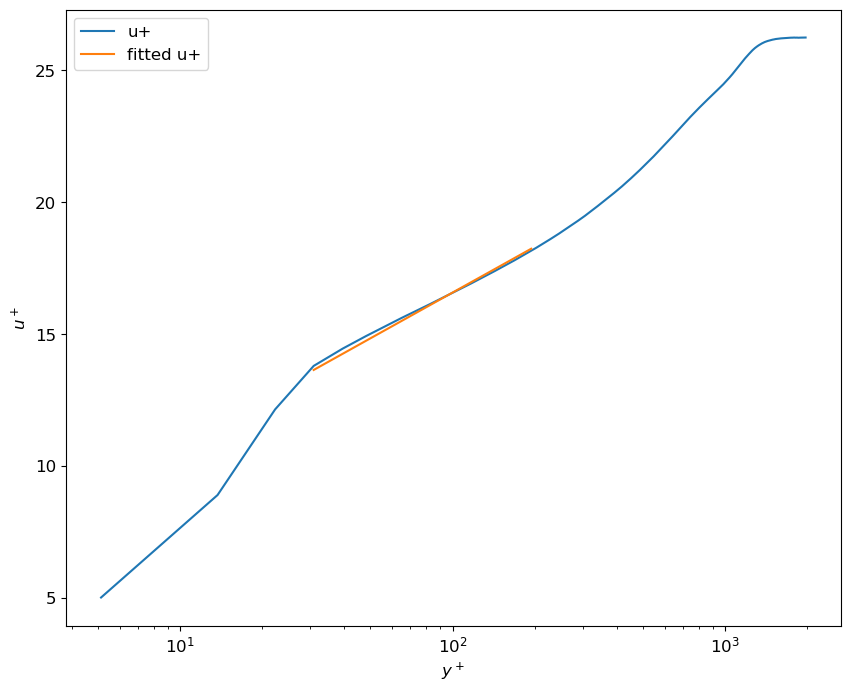

In [ ]:
# 2.(c) ===============================================================
y_plus = y * u_tau / nu
where_y_plus = [ i for i in range(len(y_plus)) if 30 < y_plus[i] < Re_tau * 0.15]
print('form y =', y[where_y_plus[0]], 'to y =', y[where_y_plus[-1]])
print('form y+ =', y_plus[where_y_plus[0]], 'to y+ =', y_plus[where_y_plus[-1]])

A = 5
kappa = 0.4
# ======== curve fit ======================
def curve(y, u_tau):
    return u_tau * (np.log(y * u_tau / nu) / kappa + A)

u_tau_fit, param_covct = scipy.optimize.curve_fit(curve, \
    y[where_y_plus], u_bar_delta[where_y_plus])
# =========================================


# compute new Re_tau
Re_tau_new = u_tau_fit[0] * delta / nu
print("curve fitted new u_tau = ", u_tau_fit)
print("New Re_tau = ", Re_tau_new)


# ========= plot fitted curve =============
fig, ax = plt.subplots()
u_plus_eq2 = curve(y, u_tau_fit[0]) / u_tau_fit[0]

ax.plot(y_plus, u_bar_delta / u_tau_fit, label="u+")
ax.plot(y_plus[where_y_plus], u_plus_eq2[where_y_plus],  label="fitted u+")
ax.legend(fontsize=12)
ax.set_ylabel(r"$u^+$", fontsize=12)
ax.set_xlabel(r"$y^+$", fontsize=12)
ax.set_xscale('log')
plt.savefig('1a_u1_prime.pdf', bbox_inches="tight")

In [ ]:
# 2.(d) ===============================================================
Re_x = downstreamDistance * U_inf / nu
print("Re_x = ", Re_x)

u_tau_down = (0.01 * Re_x ** -0.133 * U_inf **2)**0.5
print("u_tau downstream = ", u_tau_down)

Re_x =  1700827.3160839176
u_tau downstream =  0.3876440675338059


In [ ]:
# 2.(e) ===============================================================
c_f = 2 * (u_tau_down/U_inf) ** 2
print("friction coefficient = ", c_f)

c_f_laminar = 0.664 * Re_x ** (-0.5)
print("laminar friction coefficient = ", c_f_laminar)

friction coefficient =  0.0029672366605387273
laminar friction coefficient =  0.0005091408792995151


In [ ]:
# 3.(a) ===============================================================

where_y_plus_wake = [ i for i in range(len(y_plus)) if 30 < y_plus[i] < Re_tau]
print('form y =', y[where_y_plus_wake[0]], 'to y =', y[where_y_plus_wake[-1]])
print('form y+ =', y_plus[where_y_plus_wake[0]], 'to y+ =', y_plus[where_y_plus_wake[-1]])

A = 5
kappa = 0.4
# ======== curve fit ======================
def wake_curve(y, PI):
    return u_tau_fit * (np.log(y * u_tau_fit / nu) / kappa + A + (2 * PI / kappa * np.sin(np.pi * 0.5 * y / delta) ** 2))

PI_fit, param_covct = scipy.optimize.curve_fit(wake_curve, y[where_y_plus_wake], u_bar_delta[where_y_plus_wake])
# =========================================

print("wake strength parameter = ", PI_fit)



form y = 0.0012060872 to y = 0.052512374
form y+ = 30.941422 to y+ = 1347.1725
wake strength parameter =  [0.5470928]


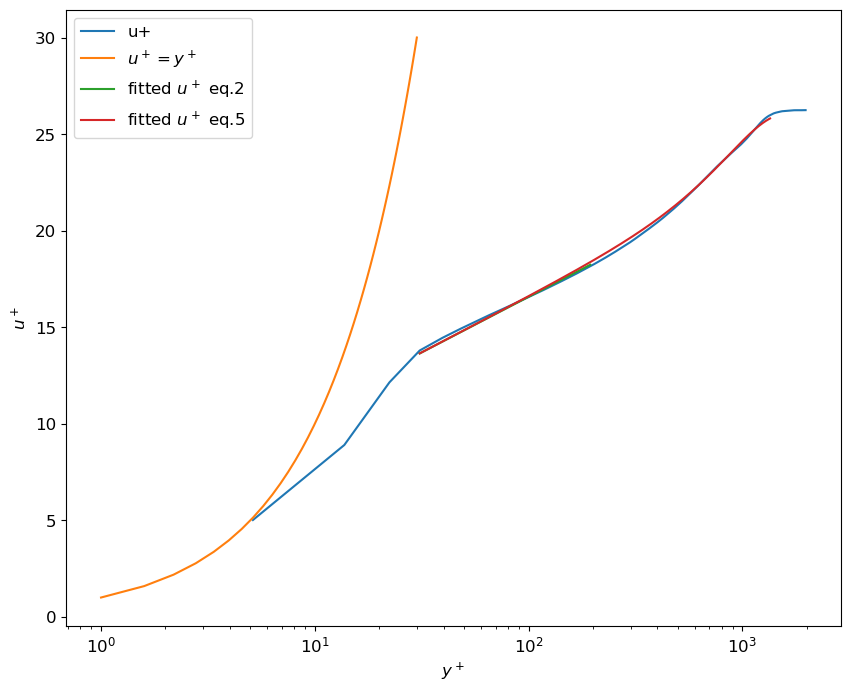

In [ ]:
# 3.(b) ===============================================================

# ========= plot =============
fig, ax = plt.subplots()
u_plus_eq5 = wake_curve(y, PI_fit[0]) / u_tau_fit

# plot curve of experimental data ======
ax.plot(y_plus, u_bar_delta / u_tau_fit, label="u+")

# plot the u+ = y+ curve ===============
VSL_points = np.linspace(1, 30)
ax.plot(VSL_points, VSL_points, label=r'$u^+ = y^+$')

# plot equation 2 curve ================
ax.plot(y_plus[where_y_plus], u_plus_eq2[where_y_plus],  label=r"fitted $u^+$ eq.2")

# plot equation 5 curve ================
ax.plot(y_plus[where_y_plus_wake], u_plus_eq5[where_y_plus_wake],  label="fitted $u^+$ eq.5")

# fig setting ==========================
ax.legend(fontsize=12)
ax.set_ylabel(r"$u^+$", fontsize=12)
ax.set_xlabel(r"$y^+$", fontsize=12)
ax.set_xscale('log')
plt.savefig('1a_u1_prime.pdf', bbox_inches="tight")

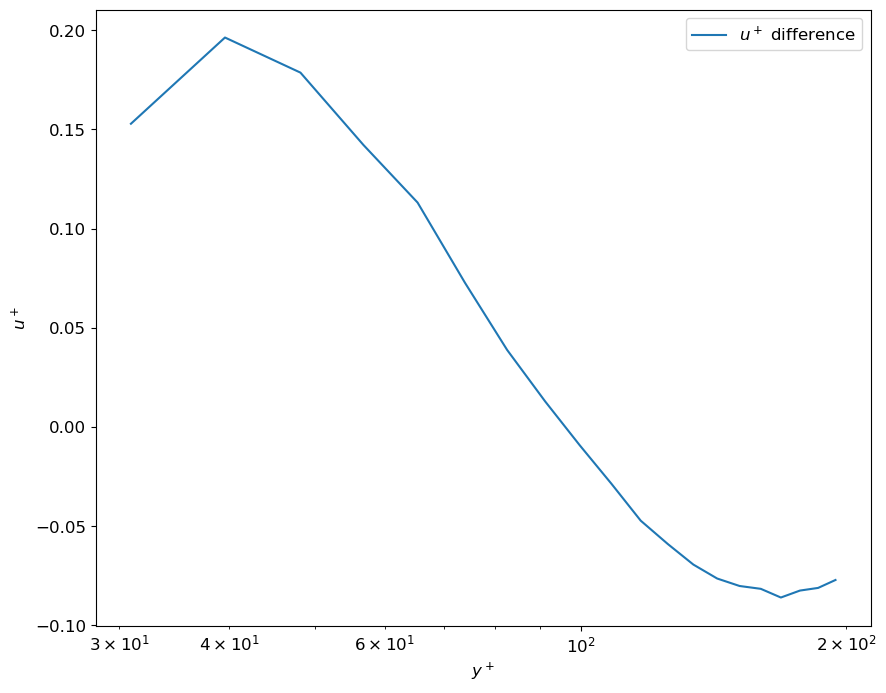

In [ ]:
# 3.(c) ===============================================================
u_plus_diff = u_bar_delta / u_tau_fit - u_plus_eq2

# ========= plot =============
fig, ax = plt.subplots()

ax.plot(y_plus[where_y_plus], u_plus_diff[where_y_plus], label=r"$u^+$ difference")
ax.legend(fontsize=12)
ax.set_ylabel(r"$u^+$", fontsize=12)
ax.set_xlabel(r"$y^+$", fontsize=12)
ax.set_xscale('log')
plt.savefig('1a_u1_prime.pdf', bbox_inches="tight")

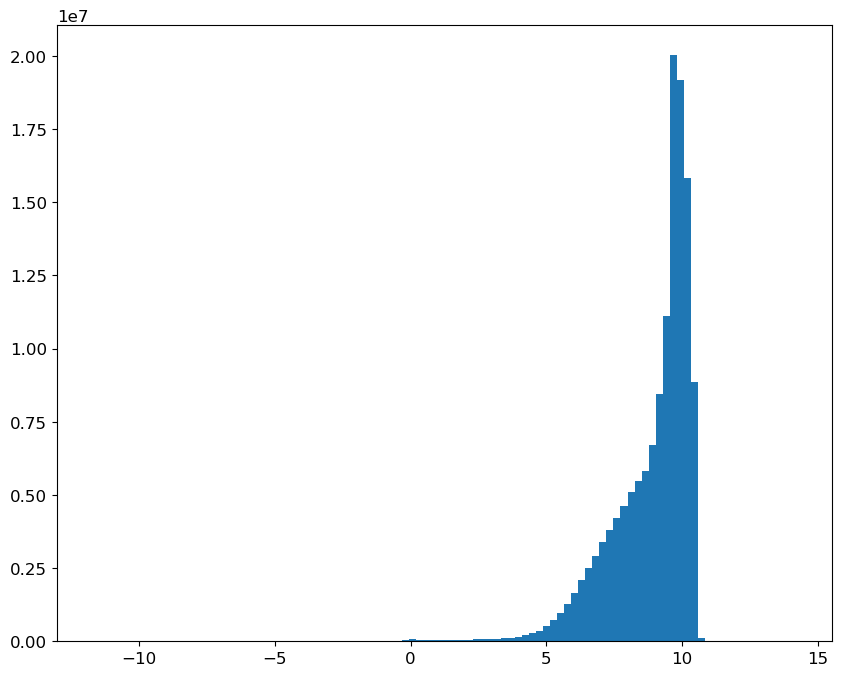

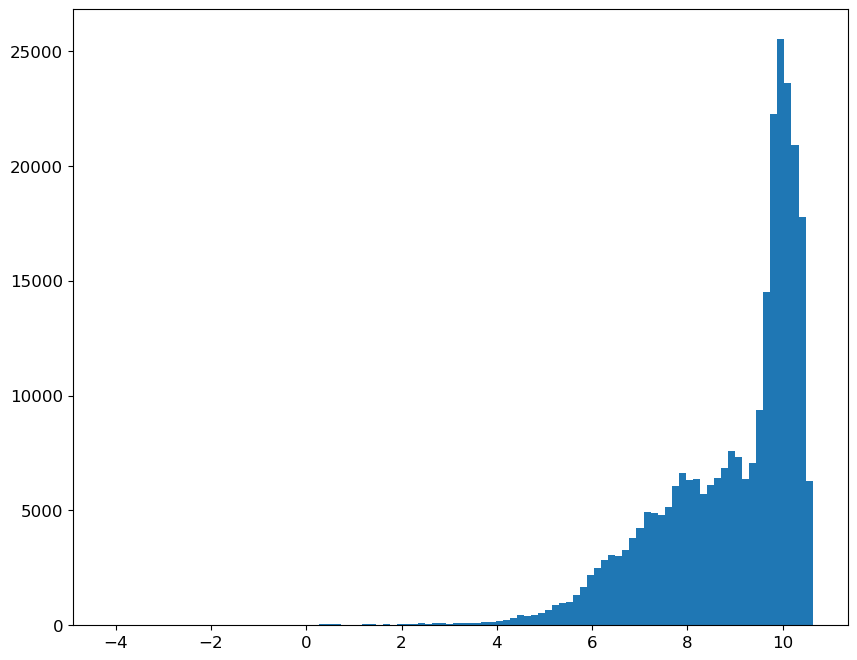

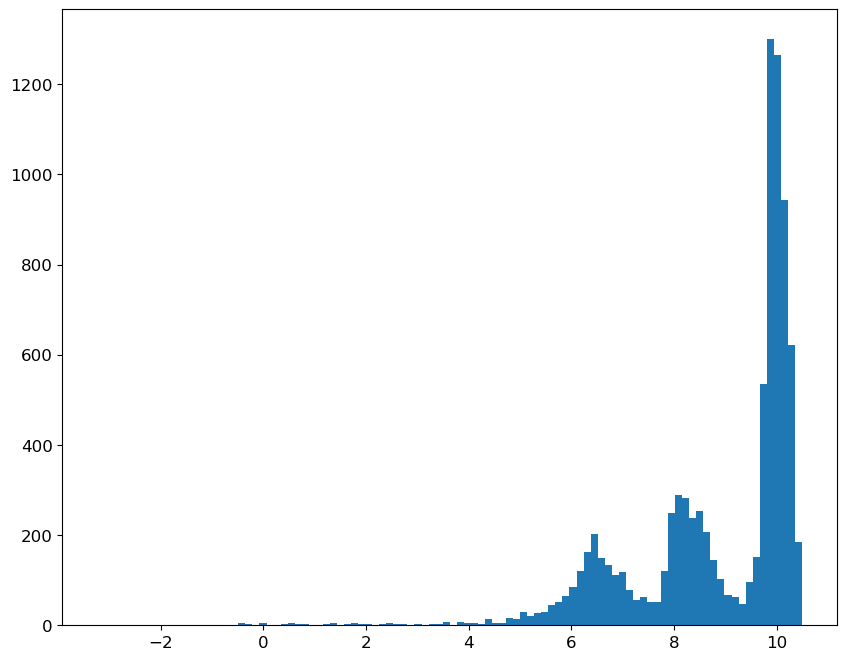

In [ ]:
# 4.(a) ===============================================================
fig, ax = plt.subplots()
ax.hist(u.flatten(), bins=100)
plt.savefig('1a_u1_prime.pdf', bbox_inches="tight")
plt.show()

fig, ax = plt.subplots()
ax.hist(u[:, :, 101].flatten(), bins=100)
plt.savefig('1a_u1_prime.pdf', bbox_inches="tight")
plt.show()

stream_range = [ i for i in range(len(x)) if 0 <= x[i]/delta <= 0.25]
fig, ax = plt.subplots()
ax.hist(u[:, stream_range[0]:stream_range[-1], 101].flatten(), bins=100)
plt.savefig('1a_u1_prime.pdf', bbox_inches="tight")
plt.show()